In [61]:
# importando bibliotecas

# numericas
import numpy as np

# manipulacao de dados
import pandas as pd

# graficas
import matplotlib.pyplot as plt
import seaborn as sns

# utilidades
# from google.colab import drive

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

In [62]:
df = pd.read_csv('https://raw.githubusercontent.com/ImagineDogs/TranstornosMentais/main/dados/df_cid10.csv')
cid_fam = pd.read_csv('https://raw.githubusercontent.com/ImagineDogs/TranstornosMentais/main/dados/CID-10%20-%20Familias.csv')
cid_df = pd.read_csv('https://raw.githubusercontent.com/ImagineDogs/TranstornosMentais/main/dados/Tabela%20CID-10.csv')

In [64]:
rem = ['cod_paciente', 'cod_regulacao', 'cod_transf_alta', 'unidade_cadastro', 'cod_unidade_origem', 'status_internacao']
df_mpd = df.drop(rem,axis=1)
df_mpd.describe()

,idade_aprox,tempo_espera_internacao,tempo_espera_aceite,idade,tempo_internacao,event,qtd_internacoes,total_repeat_cod,total_repeat,sum_los_hour,sum_outside_hour,cumsum,cumsum.1,cumsum.1(start),cod_paciente.1,start,stop,tempo_internado
count,1768.000000,8525.000000,8557.000000,7328.000000,8717.000000,8740.000000,8755.000000,8755.000000,8755.000000,8631.000000,8755.000000,8694.000000,8697.000000,8713.000000,8755.000000,8736.000000,8694.000000,8740.000000
mean,24.867081,362.493045,75.679938,37.625136,829.260747,0.810526,3.036094,117.935309,2830.447419,2484.610373,11406.345871,1551.613750,1411.105581,1125.772970,4287.321531,406.112165,1551.613750,34.487643
std,20.184264,533.564353,274.576002,14.150313,1314.417248,0.391907,2.791813,145.812684,3499.504424,3339.951711,13850.444145,2299.356717,2323.968144,2293.348114,3064.336935,1047.468341,2299.356717,54.729354
min,0.000000,0.000000,0.000000,0.000000,0.033333,0.000000,1.000000,0.000000,0.000000,0.033333,0.000000,0.033333,0.000000,0.000000,39.000000,0.000000,0.033333,-1.000000
25%,0.000000,41.062500,1.576667,27.000000,213.231111,1.000000,1.000000,0.000000,0.000000,522.874722,0.000000,315.726944,73.466667,0.000000,1624.500000,0.000000,315.726944,9.000000
50%,27.000000,196.281389,19.130278,36.000000,527.619167,1.000000,2.000000,71.297454,1711.138889,1346.150000,4633.766667,821.524861,663.871944,0.000000,3578.000000,0.000000,821.524861,22.000000
75%,40.000000,506.049722,68.163611,47.000000,991.232778,1.000000,4.000000,194.542778,4669.026667,3168.065000,20724.550000,1844.030417,1749.970000,1464.918333,6675.000000,509.104514,1844.030417,41.000000
max,84.000000,17544.907220,17544.893060,117.000000,35611.861390,1.000000,20.000000,920.953125,22102.875000,35611.861390,48092.500000,35611.861390,35611.861390,34934.358610,11078.000000,29056.307780,35611.861390,1484.000000


## Distribuições dos Dados

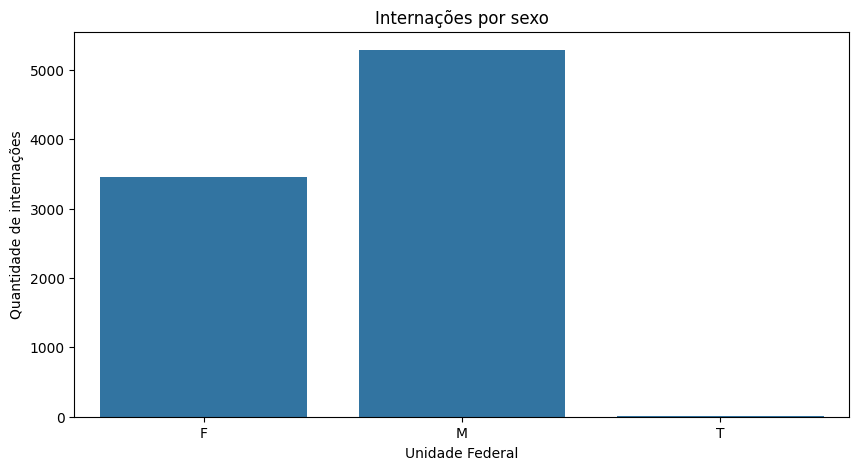

In [65]:
# Quantidade de internações por sexo
plt.figure(figsize=(10,5))
ax = sns.countplot(x='sexo', data=df)
ax.set_title('Internações por sexo')
ax.set_ylabel('Quantidade de internações')
ax.set_xlabel('Unidade Federal')
plt.show()

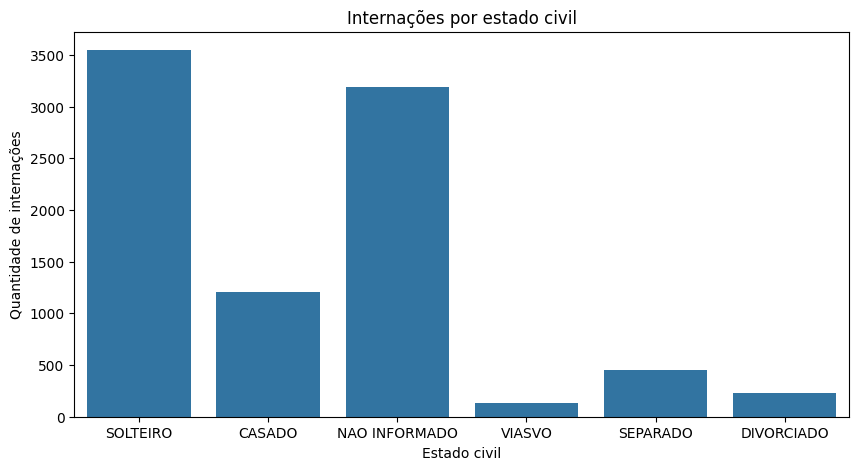

In [66]:
# Quantidade de internações por estado civil
plt.figure(figsize=(10,5))
ax = sns.countplot(x='estado_civil', data=df)
ax.set_title('Internações por estado civil')
ax.set_ylabel('Quantidade de internações')
ax.set_xlabel('Estado civil')
plt.show()

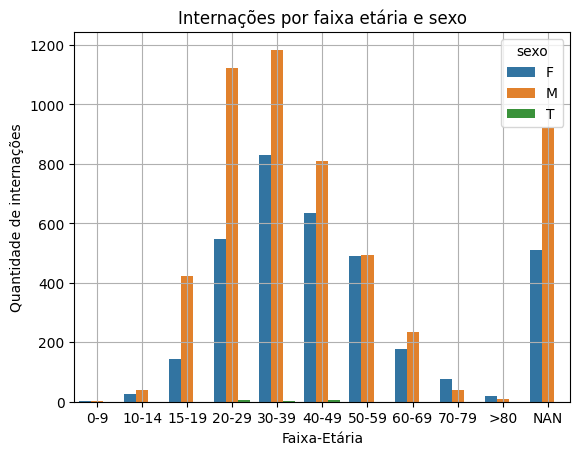

In [67]:
# Quantidade de internações por faixa-etária
faixas = list(df['faixa_etaria'].unique())
ax = sns.countplot(x='faixa_etaria', data=df,order=sorted(faixas),hue='sexo')
ax.set_title('Internações por faixa etária e sexo')
ax.set_ylabel('Quantidade de internações')
ax.set_xlabel('Faixa-Etária')
ax.grid()
plt.show()

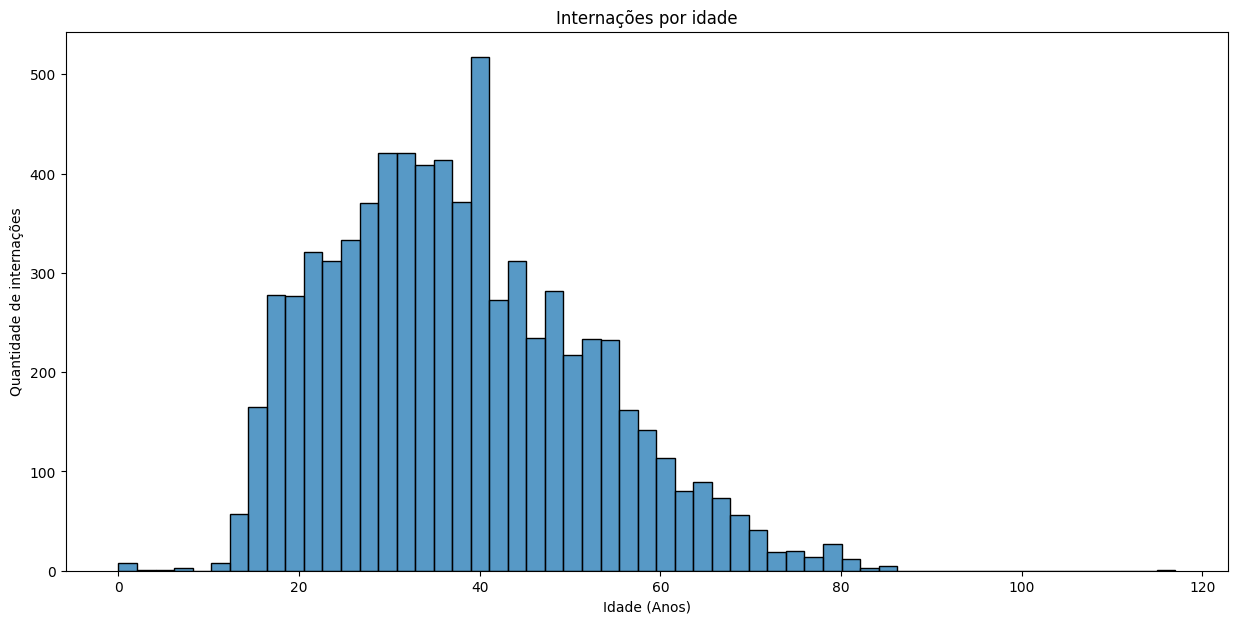

In [68]:
plt.figure(figsize=(15, 7))
ax = sns.histplot(x='idade', data=df)
ax.set_title('Internações por idade')
ax.set_ylabel('Quantidade de internações')
ax.set_xlabel('Idade (Anos)')
plt.show()

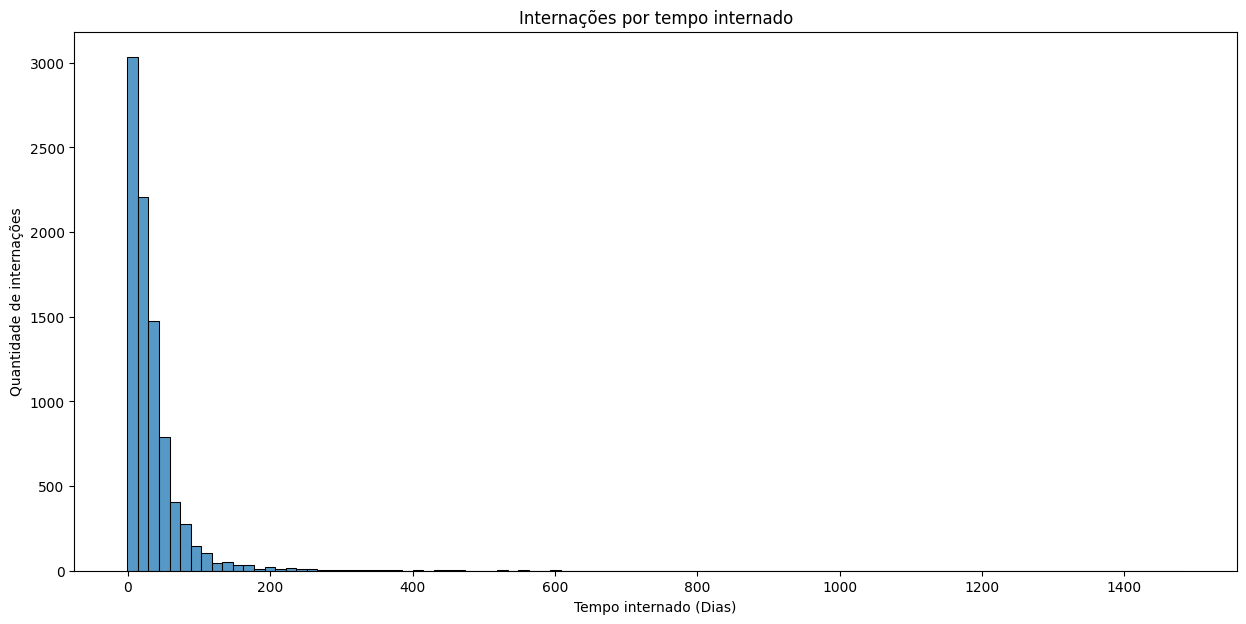

In [69]:
plt.figure(figsize=(15, 7))
ax = sns.histplot(x='tempo_internado', data=df, bins=100)
ax.set_title('Internações por tempo internado')
ax.set_ylabel('Quantidade de internações')
ax.set_xlabel('Tempo internado (Dias)')
plt.show()

## Distribuições dos Diagnósticos

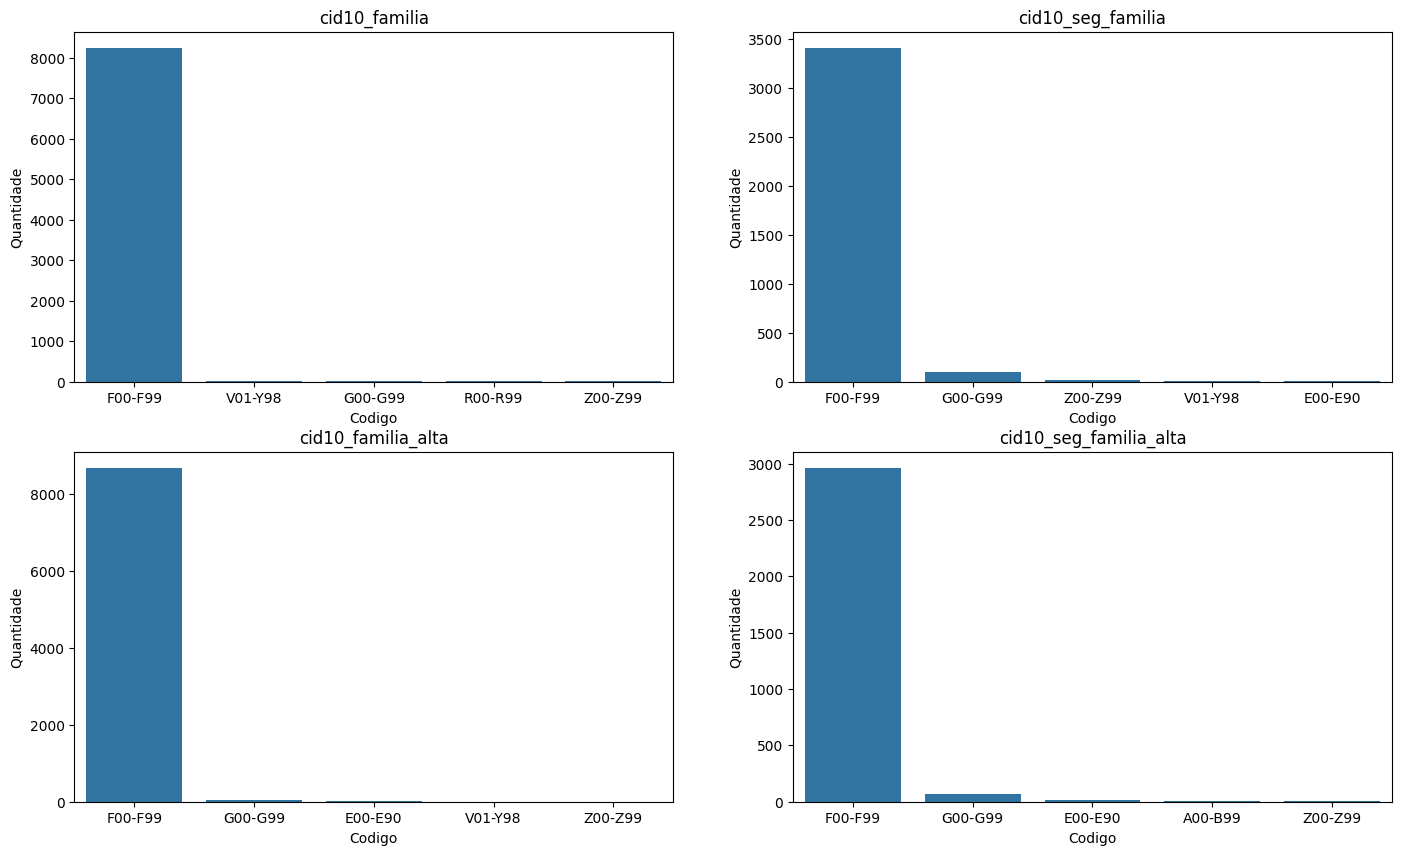

Código: A00-B99  
Descrição: Algumas doenças infecciosas e parasitárias

Código: E00-E90  
Descrição: Doenças endócrinas, nutricionais e metabólicas

Código: F00-F99  
Descrição: Transtornos mentais e comportamentais

Código: G00-G99  
Descrição: Doenças do sistema nervoso

Código: R00-R99  
Descrição: Sintomas, sinais e achados anormais de exames clínicos e de laboratório, Não classificados em outra parte

Código: V01-Y98  
Descrição: Causas externas de morbidade e de mortalidade

Código: Z00-Z99  
Descrição: Fatores que influenciam o estado de saúde e o contato com os serviços de saúde



In [70]:
plt.figure(figsize = (17, 10))

label = ['cid10_familia', 'cid10_seg_familia', 'cid10_familia_alta', 'cid10_seg_familia_alta']
final = pd.DataFrame(columns=['Codigo', 'Quantidade'])
for i in range(len(label)):
  diagnosticos = df[[label[i], 'cod_paciente']]
  diagnosticos = diagnosticos.groupby([label[i]]).count()
  diagnosticos = diagnosticos.reset_index()
  diagnosticos.columns = ['Codigo', 'Quantidade']
  diagnosticos = diagnosticos.sort_values(by='Quantidade', ascending = False)[:5]

  final = pd.concat([final, diagnosticos])



  plt.subplot(2,2,i+1)
  plt.title(label[i])
  ax = sns.barplot(x='Codigo', y='Quantidade', data=diagnosticos)

plt.show()

for i, j in cid_fam[['Codigos', 'Descricao']].loc[cid_fam['Codigos'].isin(final['Codigo'].unique())].iterrows():
  print(f'Código: {j[0]}  \nDescrição: {j[1]}\n')

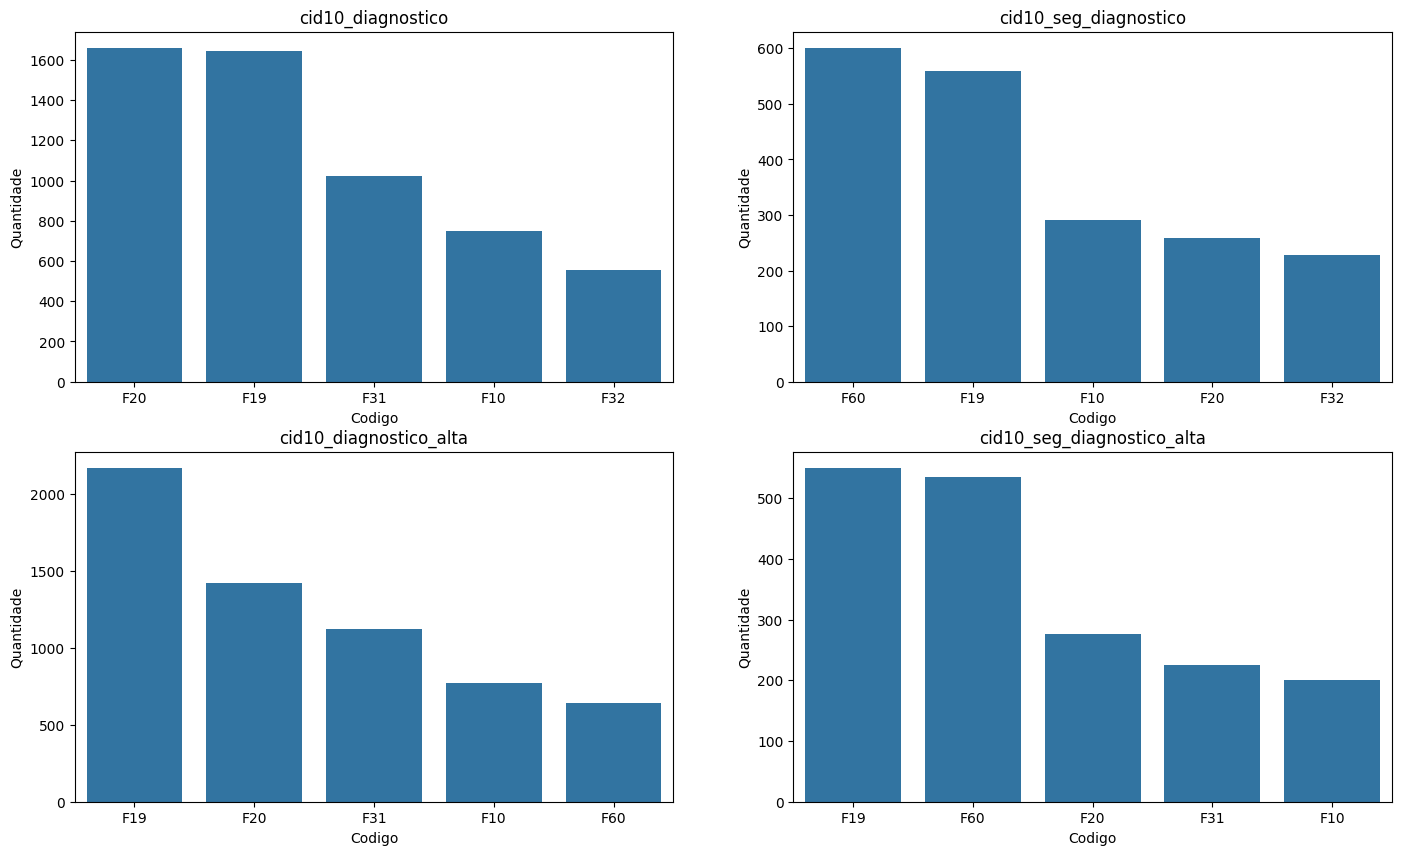


Código: F10  
Descrição: Transtornos mentais e comportamentais devidos ao uso de álcool

Código: F19  
Descrição: Transtornos mentais e comportamentais devidos ao uso de múltiplas drogas e ao uso de outras substâncias psicoativas

Código: F20  
Descrição: Esquizofrenia

Código: F31  
Descrição: Transtorno afetivo bipolar

Código: F32  
Descrição: Episódios depressivos

Código: F60  
Descrição: Transtornos específicos da personalidade



In [71]:
plt.figure(figsize = (17, 10))

label = ['cid10_diagnostico', 'cid10_seg_diagnostico', 'cid10_diagnostico_alta', 'cid10_seg_diagnostico_alta']
final = pd.DataFrame(columns=['Codigo', 'Quantidade'])
for i in range(len(label)):
  diagnosticos = df[[label[i], 'cod_paciente']]
  diagnosticos = diagnosticos.groupby([label[i]]).count()
  diagnosticos = diagnosticos.reset_index()
  diagnosticos.columns = ['Codigo', 'Quantidade']
  diagnosticos = diagnosticos.sort_values(by='Quantidade', ascending = False)[:5]

  final = pd.concat([final, diagnosticos])

  plt.subplot(2,2,i+1)
  plt.title(label[i])
  ax = sns.barplot(x='Codigo', y='Quantidade', data=diagnosticos)

plt.show()
print('')
for i, j in cid_df[['Codigo', 'Descricao']].loc[cid_df['Codigo'].isin(final['Codigo'].unique())].iterrows():
  print(f'Código: {j[0]}  \nDescrição: {j[1]}\n')

## Correlações

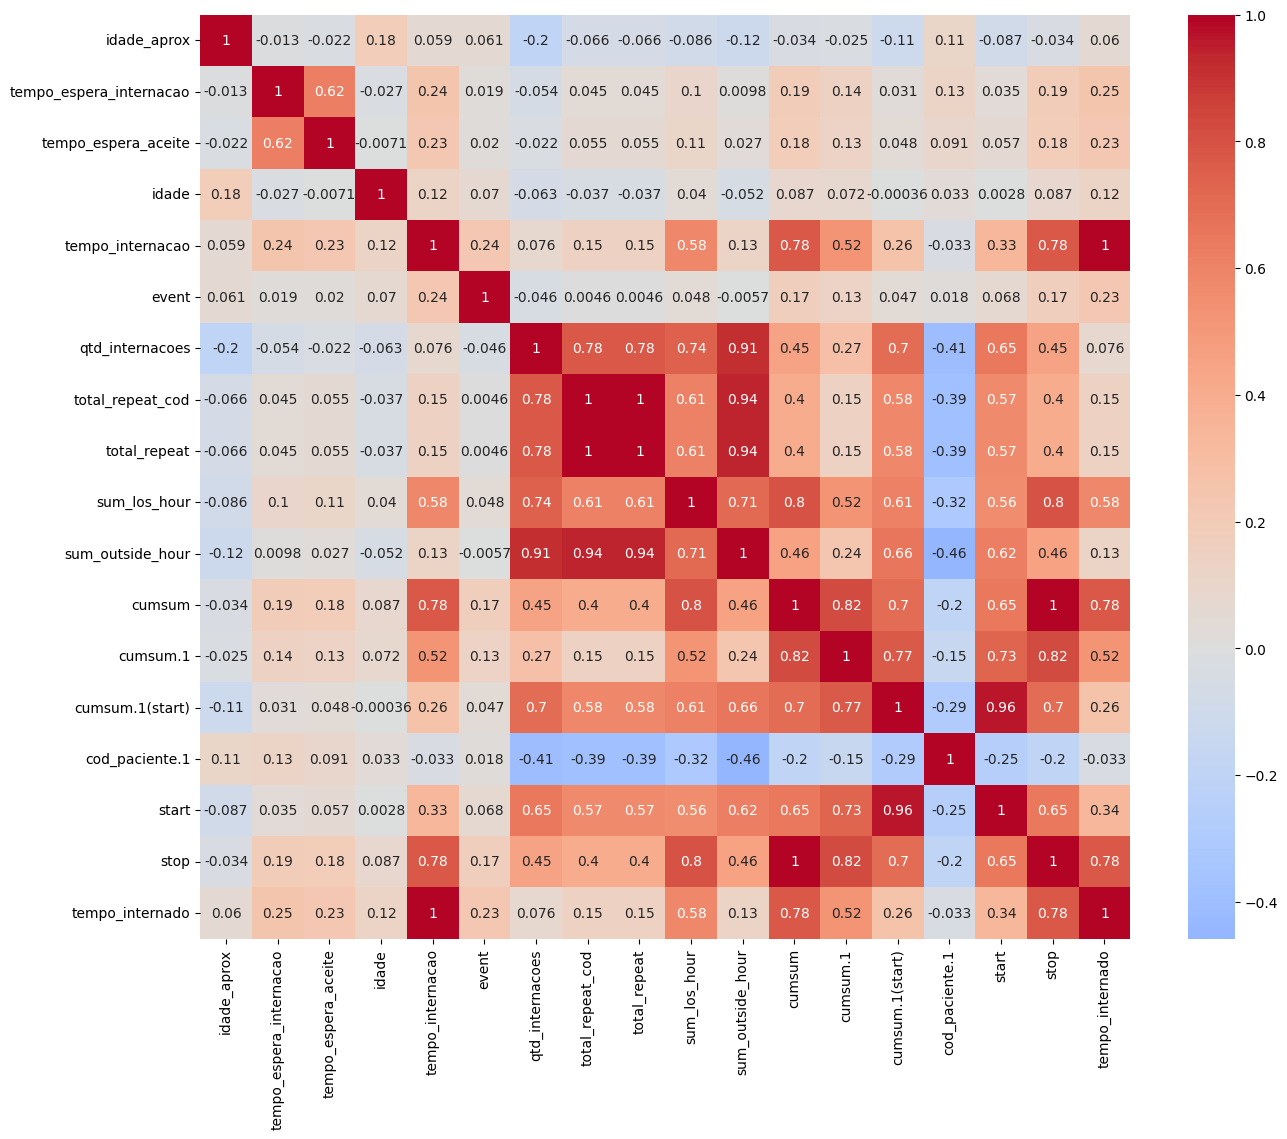

In [72]:
numeric_columns = df_mpd.columns[df_mpd.dtypes != object]

plt.figure(figsize=(15, 12))
sns.heatmap(df_mpd[numeric_columns].corr(method='spearman'),annot=True, cmap='coolwarm', center=0)
plt.show()